In [109]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
import pandas as pd

datapath = "/Users/tuanle/DynamicPricing/Data/"

Ha_Noi = pd.read_csv(datapath+"HaNoi_1month_LWVaried1.2_1.3.csv")
Ha_Noi.accept_rate = Ha_Noi.accept_rate.shift(-1)
# Ha_Noi2 = Ha_Noi2.drop("request", axis = 1)
Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent1"])
Ha_Noi = Ha_Noi.dropna(subset=["accept_rate"])
df = pd.DataFrame(Ha_Noi)



# Ha_Noi2 = pd.read_csv(datapath+"HaNoi_1month_LWVaried_Factor2.csv")
# Ha_Noi2.accept_rate = Ha_Noi2.accept_rate.shift(-1)
# # Ha_Noi2 = Ha_Noi2.drop("request", axis = 1)
# Ha_Noi2 = Ha_Noi2.dropna(subset = ["longwait_percent4"])
# Ha_Noi2 = Ha_Noi2.dropna(subset=["accept_rate"])
# df3 = pd.DataFrame(Ha_Noi2)
# len(Ha_Noi2), len(Ha_Noi)


# threshold for request
# df2 = df2.drop(df2[(df2.request < 15)].index)
#Dong_Da.describe()

In [75]:
corr_matrix = Ha_Noi.corr()
corr_matrix["accept_rate"].sort_values(ascending=False)

accept_rate          1.000000
request             -0.197986
long_waiting        -0.619737
longwait_percent1   -0.732090
longwait_percent4   -0.739608
longwait_percent2   -0.740427
longwait_percent3   -0.741485
Name: accept_rate, dtype: float64

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Ha_Noi, test_size=0.2)
Xtrain = train_set['longwait_percent2'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)

Xtrain2 = train_set['longwait_percent4'].reshape(-1,1)
Xtest2 = test_set['longwait_percent4'].reshape(-1,1)

Xtest = test_set['longwait_percent2'].reshape(-1,1)
Ytest = test_set['accept_rate'].reshape(-1,1)



# Linear Regression - ML model

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(Xtrain, Ytrain)


In [113]:
Accept_rate_prediction = model.predict(Xtest)
# print("Predictions:\t", Accept_rate_prediction)
Accept_rate_train  = model.predict(Xtrain)

# Accept_rate_prediction2 = model2.predict(Xtest2)
# print("Predictions:\t", Accept_rate_prediction2)

# len(Accept_rate_prediction)
# Accept_rate_train2 = model2.predict(Xtrain2)


# Evaluating the Lin-Reg model using cross-validations

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_mse = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable


lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error:\t",lin_rmse)
print("Mean Absolute Error:\t", lin_mae)

lin_reg = LinearRegression()
#Evaluate Lin-Reg algo on the whole training set by cross-validation
scores2 = cross_val_score(lin_reg, Xtrain, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 10)
linreg_rmse_scores2 = np.sqrt(-scores2)

#Evaluate Lin-Reg algo on the whole test set by cross-validation
scores4 = cross_val_score(lin_reg, Xtest, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 10)
linreg_rmse_scores4 = np.sqrt(-scores4)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard", scores.std())
    print("Max:", scores.max())
    print("Min:", scores.min())
    
display_scores(-scores4)

r_squared = r2_score(Ytest, Accept_rate_prediction) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model

# lin_mse = mean_squared_error(Ytrain, Accept_rate_train)
# lin_rmse = np.sqrt(lin_mse)
# print("Mean Squred Error_train:\t", lin_rmse)

Mean Square Error:	 0.058904406083
Mean Absolute Error:	 0.0432011411398
Scores: [ 0.00301932  0.00168713  0.00302138  0.00341254  0.00564806  0.00149915
  0.00909778  0.00190159  0.00370753  0.00258383]
Mean: 0.00355783079402
Standard 0.00217050424849
Max: 0.00909778034956
Min: 0.0014991507042
R^2:	 0.626720783938
Adjusted R^2:	 0.625039346028


# Plot of RMSE errors when testing our models on training set vs test set & comparing the RMSE errors in case of factor 1.2 vs 1.3

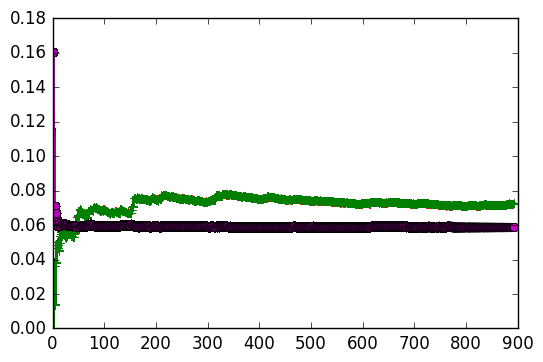

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


# #Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(Ha_Noi2['longwait_percent2'].reshape(-1,1), Ha_Noi2['accept_rate'].reshape(-1,1), test_size = 0.3, random_state= 42)
# # len(Xtrain) + len(Xtest) - len(Ytrain) - len(Ytest) -- check the size of splitting

def plot_learning_curves(model):
    train_errors, test_errors = [], []
    for m in range(1, len(Xtrain)):
        model.fit(Xtrain[:m], Ytrain[:m])
        Ytrain_predict = model.predict(Xtrain[:m])
        Ytest_predict = model.predict(Xtest)
        train_errors.append(mean_squared_error(Ytrain_predict, Ytrain[:m]))
        test_errors.append(mean_squared_error(Ytest_predict, Ytest))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
        plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="validation set")

def plot_learning_curves2(model):   
    train_errors2, test_errors2 = [], []
    for n in range(1, len(Xtrain)):
        model.fit(Xtrain2[:n], Ytrain[:n])
        Ytrain_predict2 = model.predict(Xtrain2[:n])
        Ytest_predict2 = model.predict(Xtest2)
        train_errors2.append(mean_squared_error(Ytrain_predict2, Ytrain[:n]))
        test_errors2.append(mean_squared_error(Ytest_predict2, Ytest))
        plt.plot(np.sqrt(train_errors2), "g-+", linewidth=2, label="training set")
        plt.plot(np.sqrt(test_errors2), "o-", linewidth=3, label="validation set")
        

lin_reg = LinearRegression()
plot_learning_curves(lin_reg)
plot_learning_curves2(lin_reg)





In [108]:
from sklearn.externals import joblib
filename = 'DP4model_Lin_Reg Model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)

0.626720783938
